In [1]:
import matplotlib.pyplot as plt
import numpy as np
#загружаем нужные библиотеки
Image = plt.imread("F:/test.png")
Grad = plt.imread("F:/test.png")
#адрес картинки "F:/test.png"
#Загружаем изображение в память приложения
def ShowImage(Image):
    fig, p = plt.subplots()
    p = plt.imshow(Image)
    plt.show()
#Функция необходимая для вывода изображения на экран
def scale_plot_size(factor = 1.5):
    import matplotlib as mpl
    default_dpi = mpl.rcParamsDefault['figure.dpi']
    mpl.rcParams['figure.dpi'] = default_dpi*factor

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


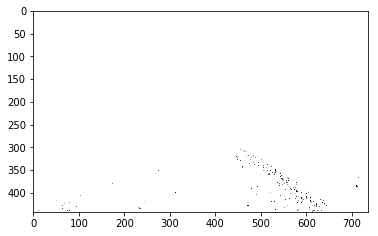

In [2]:
for i in range(len(Image)):
    for j in range(len(Image[0])):
        R = Image[i][j][0]
        G = Image[i][j][1]
        B = Image[i][j][2]
        C = 255*(R*0.03 + G*0.23 + B*0.74)
        Image[i][j][0] = C
        Image[i][j][1] = C
        Image[i][j][2] = C
ShowImage(Image)
scale_plot_size()
#В этом блоке мы делаем изображение черно-белым 

In [3]:
from math import sqrt
def Gradient(Image, dx, dy, LxSquare , LySquare, LxLy, HightGradient):
    h = len(Image) - 1 
    w = len(Image[0]) - 1
    dxdy = np.zeros((h, w))
    dxSquare = np.zeros((h, w))
    dySquare = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            dx[i][j] = (Image[i][j][0] + Image[i+1][j][0] - Image[i+1][j+1][0] - Image[i][j+1][0])/2
            dy[i][j] = (Image[i][j][0] - Image[i+1][j][0] - Image[i+1][j+1][0] + Image[i][j+1][0])/2
            dxdy[i][j] = dx[i][j]*dy[i][j]
            dxSquare[i][j] = dx[i][j]*dx[i][j]
            dySquare[i][j] = dy[i][j]*dy[i][j]
    LxSq = L(dxSquare)
    LySq = L(dySquare)
    LxLytemp = L(dxdy)
    Lx = L(dx)
    Ly = L(dy)
    
    for i in range(h - 1):
        for j in range(w - 1):
            dx[i][j] = Lx[i][j]
            dx[i][j] = Lx[i][j]
            LxSquare[i][j] = LxSq[i][j]
            LySquare[i][j] = LySq[i][j]
            LxLy[i][j] = LxLytemp[i][j]
            Grad[i][j][0] = sqrt(dx[i][j]**2 + dy[i][j]**2)/4
            Grad[i][j][1] = Grad[i][j][0]
            Grad[i][j][2] = Grad[i][j][0]
    
            
            
    temp = 0       
    for i in range(h):
        for j in range(w):
            temp+= Grad[i][j][0]*100
    temp = temp/(h*w)
    for i in range(h):
        for j in range(w):
            if 100*Grad[i][j][0] > 3*temp :
                Grad[i][j][0] = 1
                Grad[i][j][1] = 1
                Grad[i][j][2] = 1
                HightGradient.append((i,j))
            else:
                Grad[i][j][0] = 0
                Grad[i][j][1] = 0
                Grad[i][j][2] = 0
            
            
    return Grad
def L(dxory):
    result = np.zeros((dxory.shape[0]-1,dxory.shape[1]-1))
    for i in range(dxory.shape[0] - 2 ):
        for j in range(dxory.shape[1] - 3):
            result[i][j]=(dxory[i][j] + 2*dxory[i][j+1] + dxory[i][j + 2] +
                        2*dxory[i+1][j] + 4*dxory[i+1][j+1] + 2*dxory[i+1][j+2] +
                          dxory[i+2][j] + 2*dxory[i+2][j+1] + dxory[i+2][j+2] )/16
    return result
# Получаем матрицу модулей векторов градиентов в точке на изображении( дискретная первая производная) 

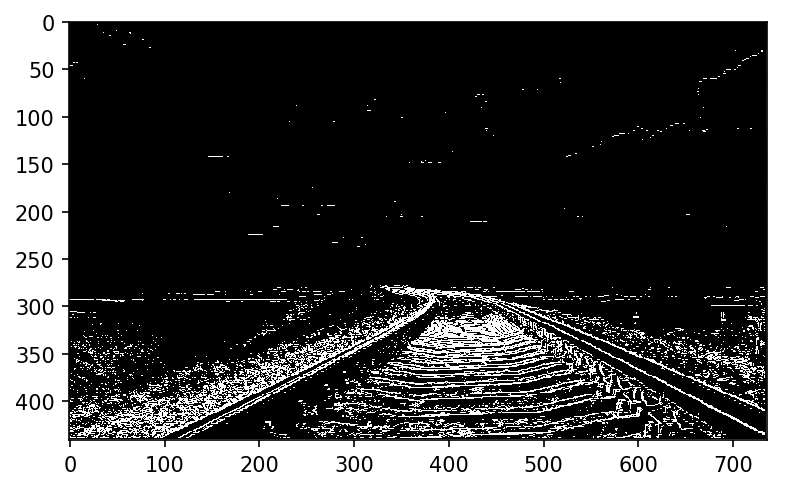

In [4]:
dx = np.zeros((len(Image) - 1,len(Image[0]) - 1 ))
dy = np.zeros((len(Image) - 1,len(Image[0]) - 1 )) 
HightGradient = []
LxSquare = np.zeros((len(Image) - 1, len(Image[0]) - 1))
LySquare = np.zeros((len(Image) - 1, len(Image[0]) - 1))
LxLy = np.zeros((len(Image) - 1, len(Image[0]) - 1))
Grad = Gradient(Image, dx, dy, LxSquare, LySquare, LxLy, HightGradient)
ShowImage(Grad)


In [5]:
MxSquare = L(LxSquare)
MySquare = L(LySquare)
Mxy = L(LxLy)

In [6]:
from math import sqrt
covariationPreMatrix = []
for i in range(300,400):
    for j in range(600,700):
        lambda1 = (MxSquare[i][j] + MySquare[i][j])/2 + sqrt(MxSquare[i][j]*MySquare[i][j] - Mxy[i][j]*Mxy[i][j]) / 2
        lambda2 =(MxSquare[i][j] + MySquare[i][j])/2 - sqrt(MxSquare[i][j]*MySquare[i][j] - Mxy[i][j]*Mxy[i][j]) / 2
        covariationPreMatrix.append([lambda1, lambda2])
        

In [7]:
covariationPreArray = np.array(covariationPreMatrix)

In [8]:
covariationMatrix = covariationPreArray.dot(np.transpose(covariationPreArray))

In [9]:
covariationMatrix.shape[1]

10000

In [10]:
covariationMatrix

array([[ 1330.59614723,   477.03539239,   412.10405264, ...,
         3822.94998073,  6083.88726023,  7857.49633716],
       [  477.03539239,   171.02991674,   147.77661324, ...,
         1372.70898526,  2185.12295164,  2822.01243657],
       [  412.10405264,   147.77661324,   127.78740625, ...,
         1194.17990906,  1903.18339864,  2457.39175489],
       ...,
       [ 3822.94998073,  1372.70898526,  1194.17990906, ...,
        11658.02264311, 18735.32979628, 24156.11710896],
       [ 6083.88726023,  2185.12295164,  1903.18339864, ...,
        18735.32979628, 30155.69998001, 38870.42986993],
       [ 7857.49633716,  2822.01243657,  2457.39175489, ...,
        24156.11710896, 38870.42986993, 50105.94385216]])

from numpy import linalg as LA 
w, v = LA.eig(covariationMatrix)
print(w)
print(v)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
pca.fit(covariationMatrix)
print("Varience :")
print(pca.explained_variance_ratio_)
print("Singular values :")
print(pca.singular_values_)

Varience :
[9.99873289e-01 1.26710837e-04 2.52986840e-30 8.38443437e-34
 7.07950809e-34 6.92536946e-34 5.40018668e-34 5.08004655e-34
 4.85941929e-34 4.41283404e-34]
Singular values :
[1.25066554e+10 1.40791222e+08 1.98937962e-05 3.62164255e-07
 3.32789979e-07 3.29147206e-07 2.90651846e-07 2.81904848e-07
 2.75715312e-07 2.62740787e-07]


In [16]:
for i in range(len(pca.components_[0])):
    if pca.components_[0][i] == max(pca.components_[0]):
        print("component 0 max: " + str(max(pca.components_[0])) + " index:" + str(i))
    if pca.components_[1][i] == max(pca.components_[1]):
        print("component 1 max: " + str(max(pca.components_[0])) + " index:" + str(i))
    

component 1 max: 0.0728257386683587 index:1288
component 0 max: 0.0728257386683587 index:5508


In [27]:
def fiveMax(vector):
    maxv = [-1000]
    for i in vector:
        if i > maxv[-1]:
            maxv.append(i)
            if len(maxv) > 6:
                del maxv[0]
    return maxv

In [139]:
r = pca.transform(covariationMatrix)

In [30]:
for i in range(5):
    max0 = fiveMax(pca.components_[i])
    print(max0)

[0.040088426094389853, 0.046331209390268295, 0.054696589719563794, 0.05546185801943363, 0.0643967570093659, 0.0728257386683587]
[0.01913975872225695, 0.0343608240081038, 0.045765595033116224, 0.06283361026556879, 0.06586135723014964, 0.0782291870057899]
[0.04930704024797874, 0.056386043147430495, 0.07576961614556661, 0.10968400997033202, 0.11970747898061533, 0.1287550380644209]
[0.0652184094885957, 0.07893253290436857, 0.08641672118215368, 0.09397738999776423, 0.10922761812715256, 0.14214830387910218]
[0.044554512776185946, 0.08130243024447276, 0.08231833088153608, 0.08734016641034374, 0.10114314193156478, 0.11249061557039715]


(array([3.149e+03, 1.161e+03, 9.710e+02, 7.080e+02, 5.910e+02, 4.970e+02,
        4.030e+02, 3.430e+02, 2.870e+02, 2.250e+02, 1.790e+02, 1.650e+02,
        1.220e+02, 1.110e+02, 1.070e+02, 7.800e+01, 6.900e+01, 5.200e+01,
        6.200e+01, 5.700e+01, 5.600e+01, 5.200e+01, 5.100e+01, 4.700e+01,
        3.100e+01, 3.700e+01, 3.500e+01, 2.800e+01, 2.000e+01, 1.100e+01,
        2.700e+01, 1.400e+01, 1.200e+01, 5.000e+00, 2.200e+01, 1.900e+01,
        1.100e+01, 1.300e+01, 5.000e+00, 1.000e+01, 1.400e+01, 1.000e+01,
        1.300e+01, 2.000e+01, 9.000e+00, 1.000e+01, 9.000e+00, 1.400e+01,
        6.000e+00, 9.000e+00, 1.200e+01, 4.000e+00, 1.000e+00, 3.000e+00,
        3.000e+00, 3.000e+00, 5.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([1.05283866e-05, 1.58709824e-03, 3.16366809e-03, 4.74023794e-03,
        6.31680780e-03, 7.89337765e-03, 9.46994750e-03, 1.10

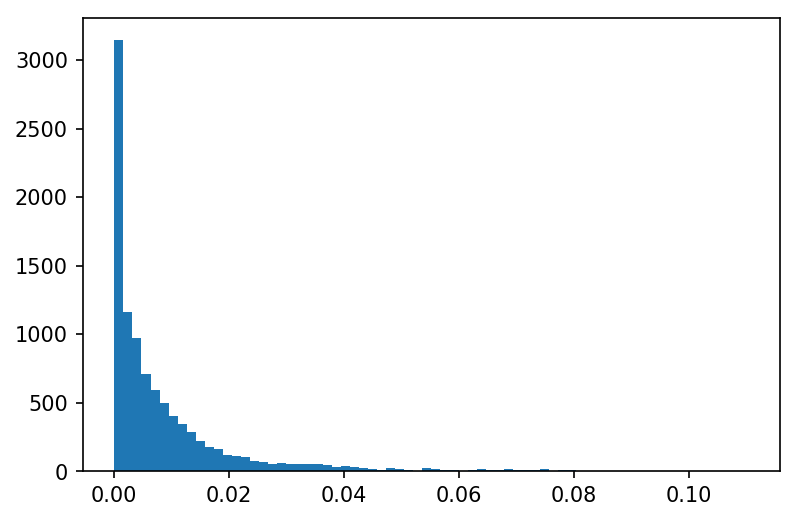

In [133]:
plt.hist(np.transpose(covariationPreArray)[0],bins = 70)

(array([4.430e+03, 1.712e+03, 9.990e+02, 6.780e+02, 4.360e+02, 3.290e+02,
        2.280e+02, 1.650e+02, 1.160e+02, 8.700e+01, 8.400e+01, 6.200e+01,
        5.900e+01, 4.400e+01, 4.000e+01, 3.500e+01, 6.200e+01, 4.900e+01,
        3.000e+01, 3.200e+01, 2.000e+01, 2.400e+01, 2.300e+01, 1.200e+01,
        1.700e+01, 1.600e+01, 1.100e+01, 1.400e+01, 1.600e+01, 1.200e+01,
        1.600e+01, 1.700e+01, 1.600e+01, 2.000e+01, 1.300e+01, 7.000e+00,
        1.200e+01, 6.000e+00, 5.000e+00, 5.000e+00, 6.000e+00, 7.000e+00,
        2.000e+00, 5.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 4.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([3.68031723e-06, 1.35733235e-03, 2.71098439e-03, 4.06463643e-03,
        5.41828847e-03, 6.77194051e-03, 8.12559254e-03, 9.47924458e-03,
        1.08328966e-02, 1.21865487e-02, 1.35402007e-02, 1.48938527e-02,
        1.62475048e-02, 1.76011568e-02, 1.

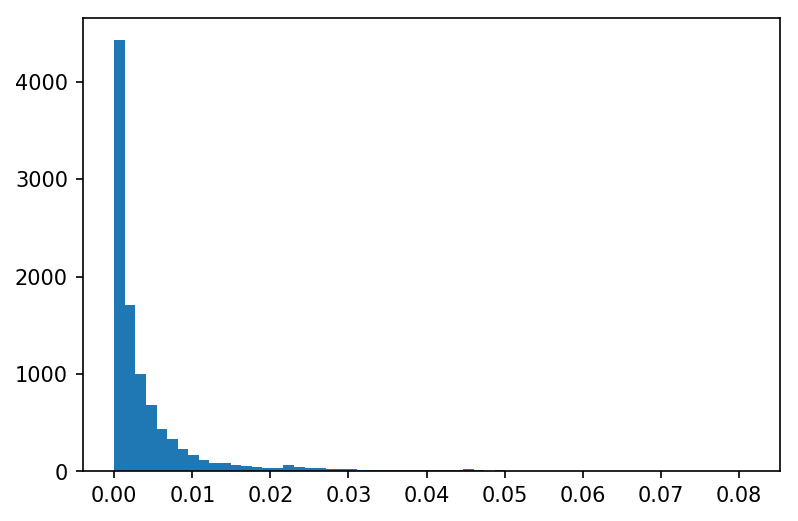

In [134]:
plt.hist(np.transpose(covariationPreArray)[1],bins = 60)

[2 2 2 ... 2 2 2]


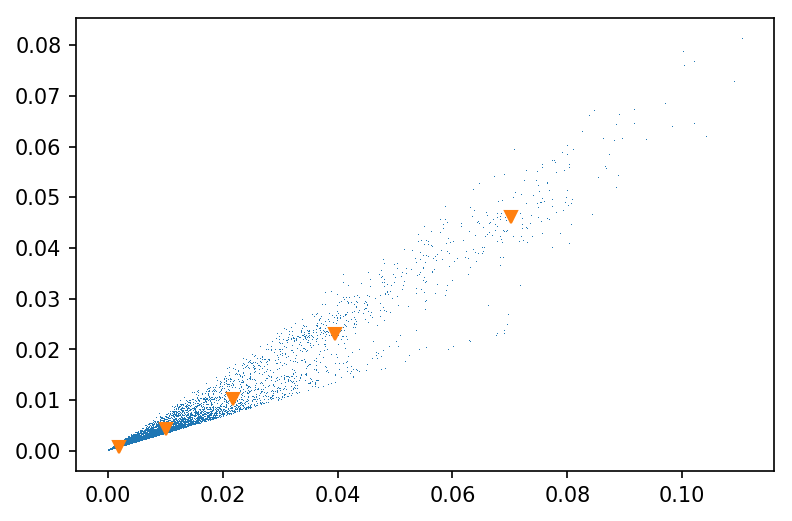

In [135]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state=0).fit(covariationPreArray)
print(kmeans.labels_)
kmeans.cluster_centers_

plt.plot(np.transpose(covariationPreArray)[0],np.transpose(covariationPreArray)[1] ,",")
plt.plot(np.transpose(kmeans.cluster_centers_)[0],np.transpose(kmeans.cluster_centers_)[1] ,"v")

In [95]:
np.transpose(kmeans.cluster_centers_)

array([[ 169.39958548, 5494.51821134, 1052.22268088, 2722.64983813],
       [  74.95589115, 3813.35487996,  503.12118486, 1636.41716987]])